<a href="https://colab.research.google.com/github/Kaya-P/work/blob/master/NeuroFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Neuroflow** ##

Part 1 - GAD7

importing all libraries that will be used





In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime


In [3]:
raw_data_df = pd.read_csv('/content/drive/MyDrive/phq_all_final.csv')  

In [4]:
data_df = raw_data_df.copy()

We then change the format of the dates provided into the datatime type. Then sort by date so when we group by patient_id the the records fro each patient will start from the earliest record to the latest record. This will help with later manipulation where we compare initial scores to final scores 

In [6]:
data_df['date'] =  pd.to_datetime(data_df['date'], format='%Y-%m-%dT%H:%M:%S.%f')
data_df['patient_date_created'] =  pd.to_datetime(data_df['patient_date_created'], format='%Y-%m-%dT%H:%M:%S.%f')
# data_df['time'] = data_df['date'].dt.time
data_df['date'] = data_df['date'].dt.date
data_df['patient_date_created'] = data_df['patient_date_created'].dt.date


In [7]:
name_df = data_df.sort_values(by=['date'], ascending=False)
name_df = data_df.groupby('patient_id')


In [8]:
name_df.head()

,date,patient_id,type,patient_date_created,score
0,2019-08-26,8430,gad7,2019-06-03,6
1,2019-11-15,8430,gad7,2019-06-03,1
2,2019-10-07,14338,gad7,2019-06-03,10
3,2019-11-04,14338,gad7,2019-06-03,7
4,2019-12-02,14338,gad7,2019-06-03,9
...,...,...,...,...,...
53693,2020-07-31,10683,gad7,2020-07-31,1
53694,2020-07-31,12344,gad7,2020-07-31,1
53695,2020-07-31,17475,gad7,2020-07-31,7
53696,2020-07-31,9069,gad7,2020-07-31,3


To get a picture of the data we are looking at I ploted a random sample of 10 patients scores. In this random sample displayed we se patient 604 who seems to have scores above 10 for most if their time taking these surveys and ending up with a score of six in April 2020 shwoing the therapy working over time for them.

In [123]:
a=np.arange(name_df.ngroups)
np.random.shuffle(a)

temp = data_df[name_df.ngroup().isin(a[:10])]

In [124]:
temp = temp.groupby('patient_id')

(array([737303., 737333., 737364., 737394., 737425., 737456., 737485.,
        737516., 737546., 737577., 737607.]),
 <a list of 11 Text major ticklabel objects>)

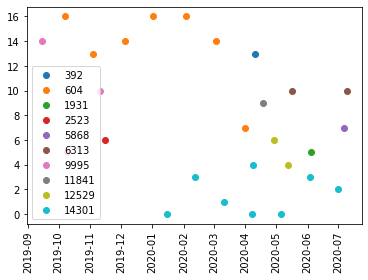

In [128]:
# plt.rc('font', size=12)
# fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
leg = []
for name, group in temp:
  plt.scatter(group.date, group.score, label='scores')
  leg.append(name)
plt.legend(leg)
plt.xticks(rotation = 90)


In [12]:
name_df.head()

,date,patient_id,type,patient_date_created,score
0,2019-08-26,8430,gad7,2019-06-03,6
1,2019-11-15,8430,gad7,2019-06-03,1
2,2019-10-07,14338,gad7,2019-06-03,10
3,2019-11-04,14338,gad7,2019-06-03,7
4,2019-12-02,14338,gad7,2019-06-03,9
...,...,...,...,...,...
53693,2020-07-31,10683,gad7,2020-07-31,1
53694,2020-07-31,12344,gad7,2020-07-31,1
53695,2020-07-31,17475,gad7,2020-07-31,7
53696,2020-07-31,9069,gad7,2020-07-31,3


I then calculated the overall difference in scores for each pateint. A negative overall difference would show that they got better over time, a 0 overall score would show that there was no chnage in how they felt and lastly a positive overall difference would show that they got worse over time.

In [13]:
data_df['overall difference'] = data_df.groupby('patient_id')['score'].transform(lambda x: x.iat[-1] - x.iat[0])

In [14]:
x = data_df.groupby('patient_id')

In [15]:
data_df.head()

,date,patient_id,type,patient_date_created,score,overall difference
0,2019-08-26,8430,gad7,2019-06-03,6,-5
1,2019-11-15,8430,gad7,2019-06-03,1,-5
2,2019-10-07,14338,gad7,2019-06-03,10,-1
3,2019-11-04,14338,gad7,2019-06-03,7,-1
4,2019-12-02,14338,gad7,2019-06-03,9,-1


I then chose to focus on patients that recorded a score of ten at any point of time in taking the surveys and having more than one record. I did this because a score of ten signifies that the patients should under go further clinical evauation. By including all patients that recorded a 10 means I included patients that started with a lower score and then got worse or the opposite of that also. By including patients that have at least 2 records, this made analysing the differences more meaningful because we could see if treatment was helping or not.

In [102]:
g = dict(data_df['patient_id'].value_counts())
new_g = {k: v for k, v in g.items() if v > 1}
g_List = list(new_g.keys())  
temp_df = data_df.loc[data_df['score'] == 10]
patients = temp_df['patient_id'].unique()
patnts = [p for p in patients if p in g_List]
print(patnts)

[14338, 7561, 10735, 9834, 7890, 3681, 571, 7340, 4554, 1629, 6574, 15558, 6221, 10687, 1365, 14122, 16584, 2025, 15681, 10230, 11085, 15, 1951, 14148, 16472, 17485, 15066, 6454, 18230, 11699, 784, 15140, 14278, 16427, 4749, 9064, 10108, 654, 1766, 1102, 4549, 6497, 13011, 1222, 1708, 17809, 7571, 14350, 9261, 13855, 17583, 4156, 13171, 2826, 2747, 9147, 11461, 4019, 477, 12451, 3665, 1488, 10995, 15636, 10526, 5529, 9839, 8074, 8978, 5844, 8693, 9970, 14095, 6126, 14162, 8392, 2594, 5320, 11390, 16401, 5818, 12906, 16207, 2511, 17232, 18080, 582, 10914, 12526, 8342, 3666, 9657, 9176, 5105, 13670, 1502, 11790, 15860, 7145, 3198, 5289, 12353, 8948, 11593, 17506, 11589, 17960, 5253, 10265, 13570, 4788, 4753, 6097, 15546, 9296, 1689, 13060, 7818, 14920, 7166, 15639, 85, 2755, 3544, 11235, 7305, 14352, 879, 1728, 8714, 10768, 10442, 11476, 2835, 13223, 6274, 3162, 1151, 16530, 10271, 4423, 383, 8695, 11236, 13879, 4585, 11616, 10388, 1939, 2249, 5888, 4319, 813, 3803, 15807, 12332, 12608, 

In [103]:
patients_df = data_df[data_df['patient_id'].isin(patnts)]

I then included an inidcator column the signifies if the patients got better, worse or stayed the same. This was to make further grouping easier

In [104]:
patients_df['felt_better'] = np.where(
    patients_df['overall difference'] == 0, 0, np.where(
    patients_df['overall difference'] >  0, 1, -1)) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



I ploted the averages scores of the patients who got better (-1), felt the same (0) and got worse (1) and their respective standard deviations. I found that patients who got worse, on average felt worse than the two other groups of patients. The error bars look relatively similar signifying a relatively equal spread of scores around the respective means.

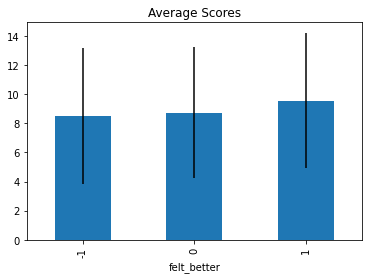

In [147]:
plotting_df = patients_df.groupby("felt_better").agg([np.mean, np.std])
values = plotting_df['score']
values.plot(kind = "bar", y = "mean", legend = False,
            title = "Average Scores", yerr = "std")


In [153]:
temp_df = patients_df.copy()
df = temp_df.drop(['date', 'type', 'patient_date_created'], axis = 1)
new_df = df.groupby(['felt_better','patient_id'])
new_df.head()

,patient_id,score,overall difference,felt_better
2,14338,10,-1,-1
3,14338,7,-1,-1
4,14338,9,-1,-1
37,7561,19,-10,-1
38,7561,16,-10,-1
...,...,...,...,...
52930,14453,12,8,1
52960,7955,10,0,0
52961,7955,10,0,0
53510,10430,10,2,1


I then wanted to see how the scores changed of the time period for each of these groups of patients. I grouped by the indicator column and patient id and selected the first record of each of these groups giving the inital score of each patients (remeber that I initally sorted by ascendeing date). I then got the last record for each of these groups getting the latest score for each of the patients in each group. Lastly i merged these two datasets such that the inital and final score for each patients could be found in one record. 

In [157]:
temp_df = patients_df.copy()
new_df = temp_df.drop(['date', 'type', 'patient_date_created'], axis = 1)
worse_df = new_df[new_df['overall difference'] > 0]
same_df = new_df[new_df['overall difference'] == 0]
better_df = new_df[new_df['overall difference'] < 0]
worse_count = len(worse_df.index)
same_count = len(same_df.index)
better_count = len(better_df.index)
print(worse_count)
print(same_count)
print(better_count)



1994
353
2996


I then wanted to see how many patients fell into these three groups. We can see that most patients who recorded a score of over 10 ultimatley felt bettere over time. This shows that the treatment they undergo had positive effects on their mental health. The fewest number felt the same. We can also see almost 2000 (37%) patients got worse which is a significatn amount. For these patients it would do well if we could break down the type of treatments they were recieving and try understand why it wasn't working and if different treatment would be better. 

Text(0.5, 1.0, 'Distribution of Patients who got Better, Worse and Felt the Same')

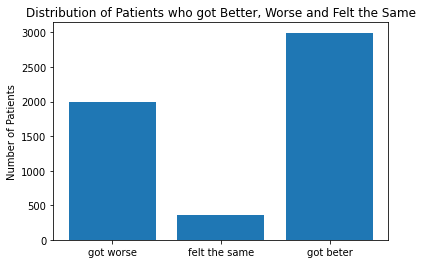

In [160]:
plt.bar(['got worse', 'felt the same', 'got beter'], [worse_count, same_count, better_count])
plt.ylabel('Number of Patients')
plt.title('Distribution of Patients who got Better, Worse and Felt the Same')


In [69]:
inital_df

score  overall difference
felt_better patient_id                           
-1          11              2                  -2
            20              6                  -4
            43              7                  -3
            44              9                  -9
            67              6                  -4
...                       ...                 ...
 1          18332           6                   1
            18350           6                   1
            18354           9                   6
            18370           5                   5
            18375           6                   8

[2049 rows x 2 columns]

In [68]:
last_df

score  overall difference
felt_better patient_id                           
-1          11              0                  -2
            20              0                  -4
            43              6                  -3
            44              5                  -9
            67              4                  -4
...                       ...                 ...
 1          18332           7                   1
            18350           5                   1
            18354          14                   6
            18370           6                   5
            18375          14                   8

[2049 rows x 2 columns]

In [107]:
new_df = pd.merge(inital_df, last_df,  how='inner', on=['felt_better','patient_id'])
new_df.rename(columns={'score_x': 'inital_score', 'score_y': 'final_score', 'overall difference_y' : 'overall_difference'}, inplace=True)
new_df = new_df.drop(['overall difference_x'], axis =1)
worse_df = new_df[new_df['overall_difference'] > 0]
same_df = new_df[new_df['overall_difference'] == 0]
better_df = new_df[new_df['overall_difference'] < 0]

In [108]:
worse_int = worse_df["inital_score"].mean()
worse_fnl = worse_df["final_score"].mean()
same_int = same_df["inital_score"].mean()
same_fnl = same_df["final_score"].mean()
better_int = better_df["inital_score"].mean()
better_fnl = better_df["final_score"].mean()


In [149]:
print(worse_int - worse_fnl)
print(same_int - same_fnl)
print(better_int - better_fnl)


-2.4405405405405407
0.75
2.6254826254826256


I then plotted the inital and final averge scores for the three groups of patients. We can see that the patients who got better and thepatients who got worse had an overal absolute change of about 2.5~ points in their scores with patients getting worse having just a slight edge in change. This shows that patients experienceing treatment who got better or worse got better or worse by the same amount on average. Compounding this with the fact that most people did get better, this signals to me that with different treatments for those who got worse, they might record lower scores.

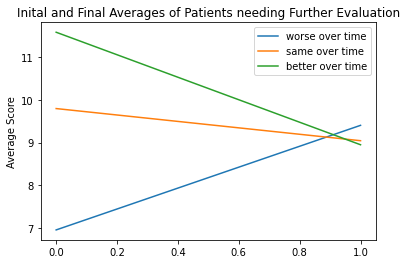

In [116]:
plt.plot([worse_int,worse_fnl], label = 'worse over time')
plt.plot([same_int,same_fnl], label = 'same over time')
plt.plot([better_int,better_fnl], label = 'better over time')
plt.ylabel('Average Score')
plt.title('Inital and Final Averages of Patients needing Further Evaluation')
plt.legend(loc="upper right")

##Final Thoughts## 
Data on the type of treatment would be extremely helpful. Data such as number of consultations (with a therapist), type of treatment would be examples of such data. Something we need to remember is that scores are relative to each patients individual patients and their perceptions of how they feel. We assumed that these scores are trustworthy measures of their mental health. I also checked for null values, and the dataset seemed to have none so no dropping or imputations were necessary. 